## House price prediction with linear regression
This linear regression model is built to predict house prices.

Dataset used here is available on kaggle:

https://www.kaggle.com/datasets/sukhmandeepsinghbrar/housing-price-dataset

### Importing libraries

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Later it will be required to load some more modules to create a linear model

### Loading dataset

In [22]:
df = pd.read_csv("Housing.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [23]:
len(df.columns)

21

This dataset contains 21 columns. Not all of them will be used in our predictions, because not all of them has correlation with price. "id", "date", "yr_built", "yr_renovated", "zipcode", latitude and longitude columns can be dropped immediately.

In [24]:
df.drop(["id", "date", "yr_built", "yr_renovated", "zipcode", "lat", "long"], axis=1, inplace=True)
# In this line we pass name of columns we want to delete, specify axis, 0 is for rows, 1 is for columns, inplace=True is used to change 
# varible df, not to create its copy
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,231300.0,2,1.00,1180,5650,1.0,0,0,3,7,1180,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1800,7503


Now some EDA(Exploratory Data Analysis) should ba applied to data, for seeing the correlation between variables. I'll use seaborn to perform EDA.

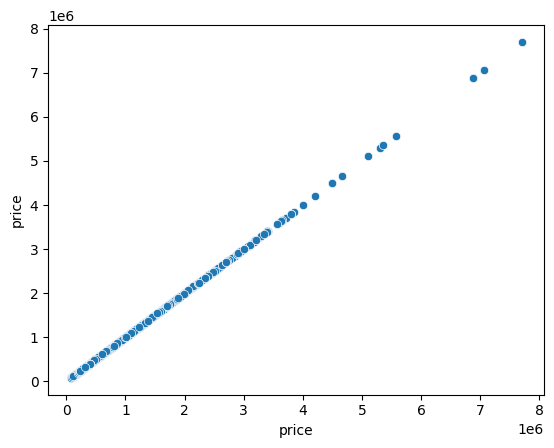

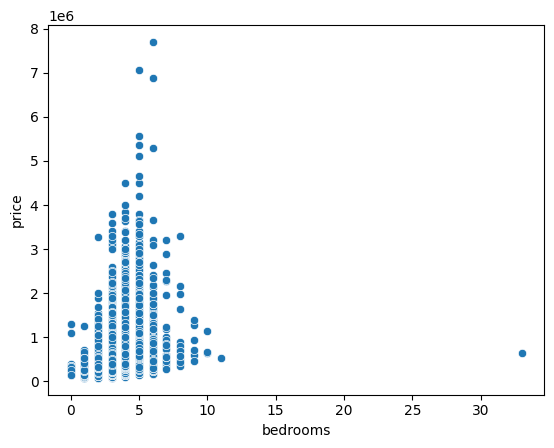

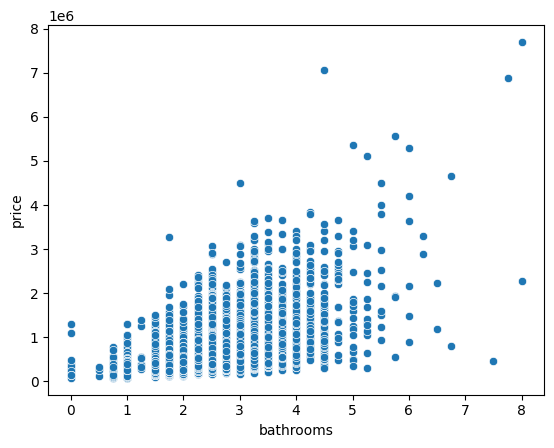

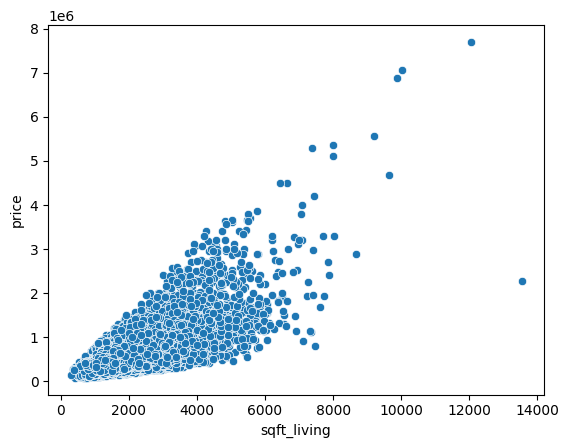

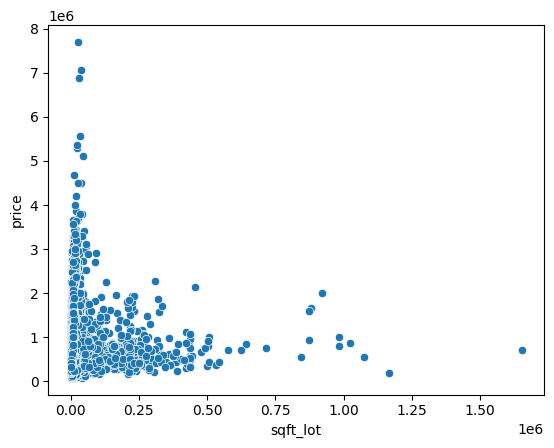

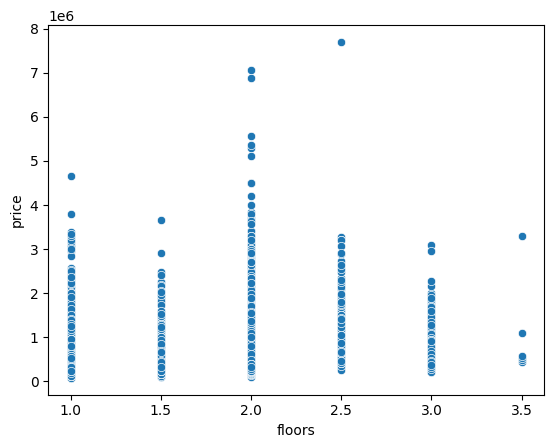

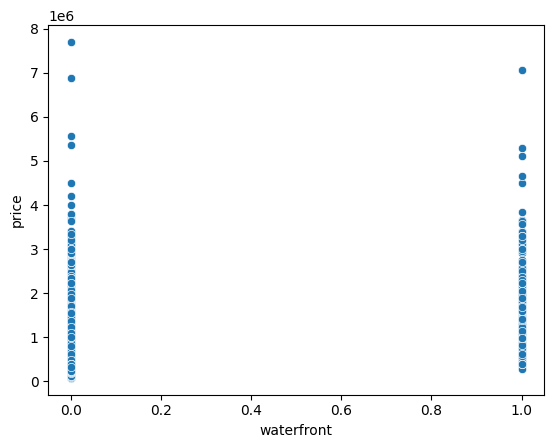

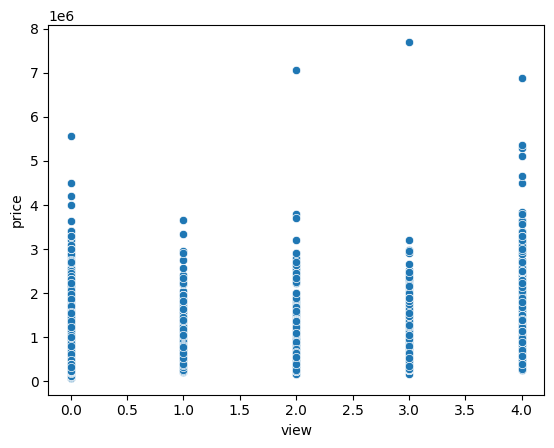

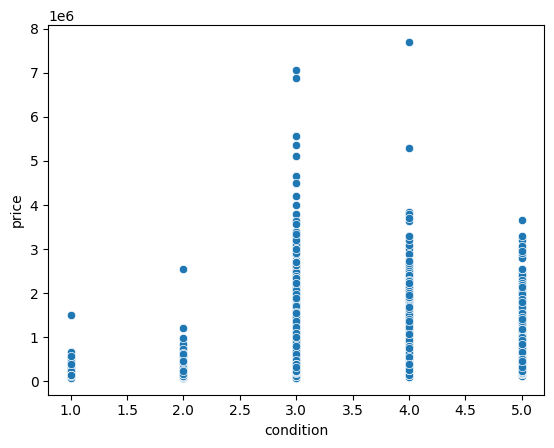

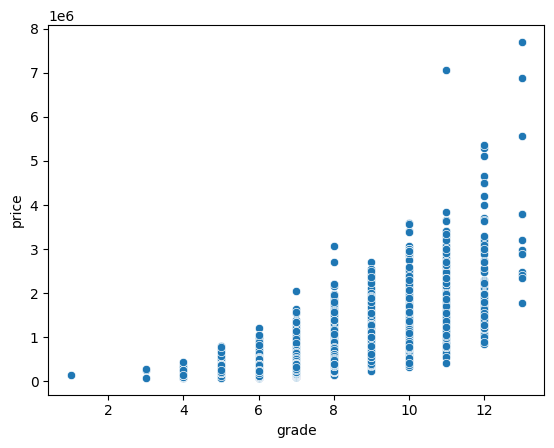

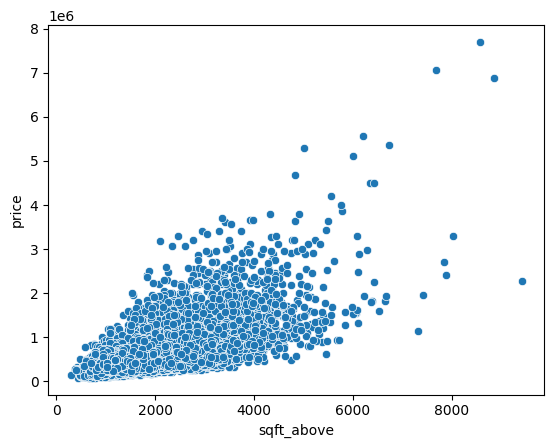

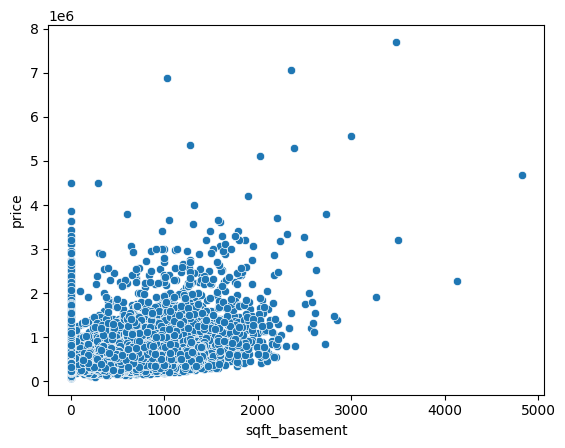

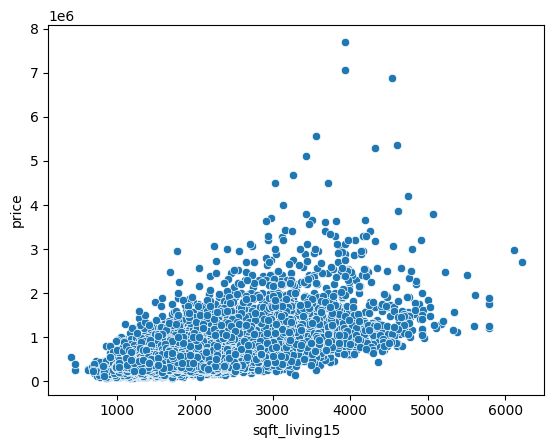

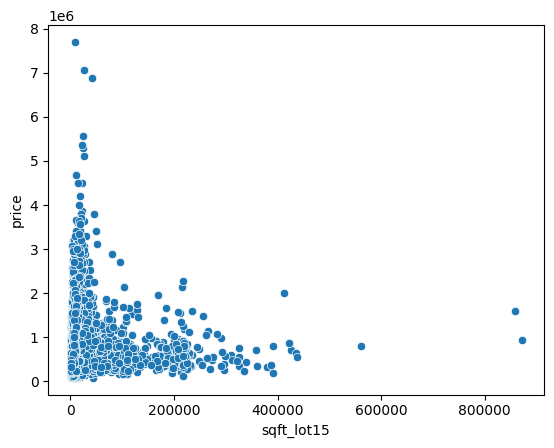

In [25]:
for label in df.columns:
    sns.scatterplot(x=label, y="price", data=df)
    plt.show()

As we can see not all variables have correlation with price. Some of them have it, but that relationship is not linear.

In [26]:
# Here I will choose only variables with linear relationship
df = df[["sqft_living", "sqft_above", "price", "sqft_living15"]]
df.head()

,sqft_living,sqft_above,price,sqft_living15
0,1180,1180,231300.0,1340
1,2570,2170,538000.0,1690
2,770,770,180000.0,2720
3,1960,1050,604000.0,1360
4,1680,1680,510000.0,1800


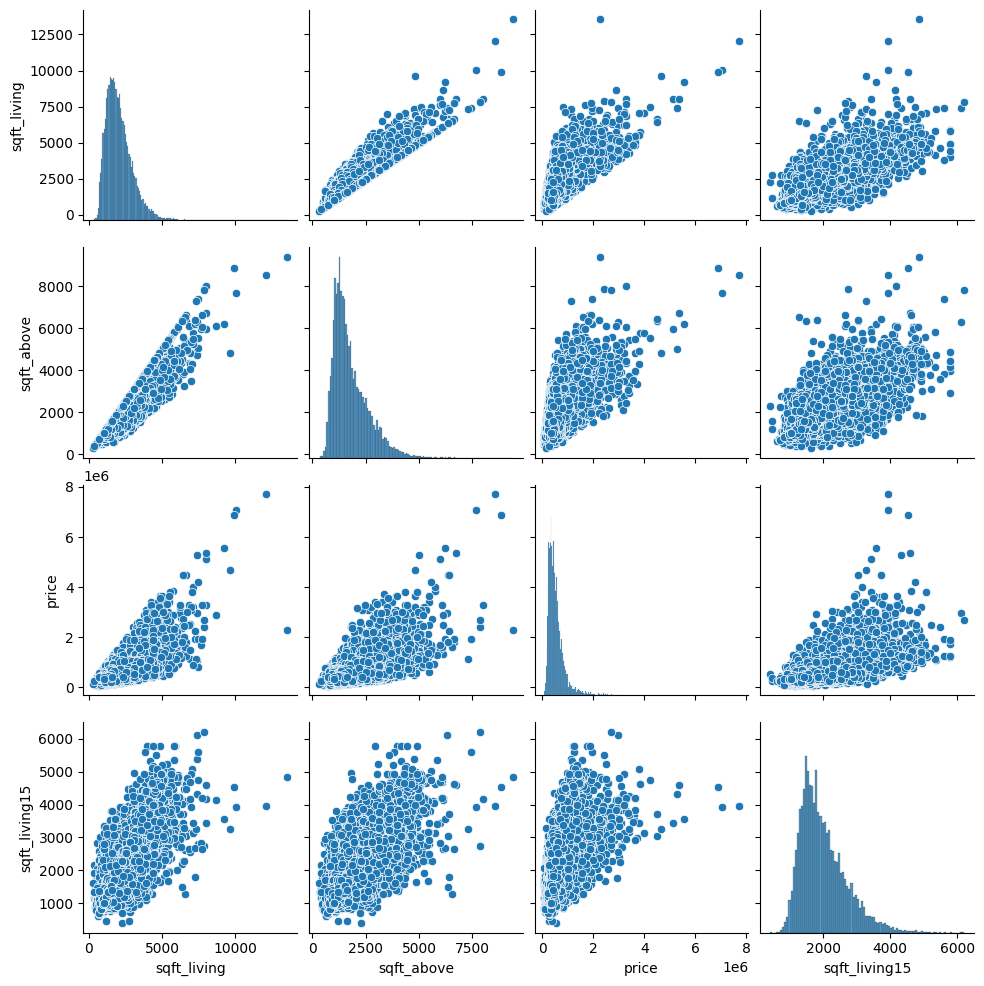

In [27]:
# Some vizualization to see relationship
sns.pairplot(data=df, kind="scatter")
plt.show()

### Preparing model

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [29]:
# X: independent variables; y: dependent variable
X = df[["sqft_living", "sqft_above", "sqft_living15"]]
y = df["price"]

Now, I will split the data into 4 parts: X_train, X_test, y_train, y_test. X/y_train will be the pair for training, X/y_test are just to know that the model is fine.

In [30]:
X.shape

(21613, 3)

In [31]:
# test_size is responsible for what percent of data will be in test
# random_state is a seed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

X_train.shape

(17290, 3)

In [32]:
X.shape[0] - (X.shape[0] * 20) / 100

17290.4

The line above validates that 20% of data was taken for test. Now, I am going to create a model.

In [33]:
# Creation of LinearRegression object
regressor = LinearRegression()
# Putting train data into it
regressor.fit(X_train, y_train)

LinearRegression()

The line below creates a dataframe with coefficients of variables, in other words, it tells us the importance of each variable in the regression.

In [34]:
coef_df = pd.DataFrame(regressor.coef_,X.columns,columns=['Coef'])
coef_df

,Coef
sqft_living,272.870141
sqft_above,-39.694549
sqft_living15,69.025101


Here is R-squared value

In [35]:
regressor.score(X, y)

0.5012138265491022

### Predictions

In [36]:
# This line makes predictions
predictions = regressor.predict(X_test)

Text(0.5, 1.0, 'Price vs. Model Predictions')

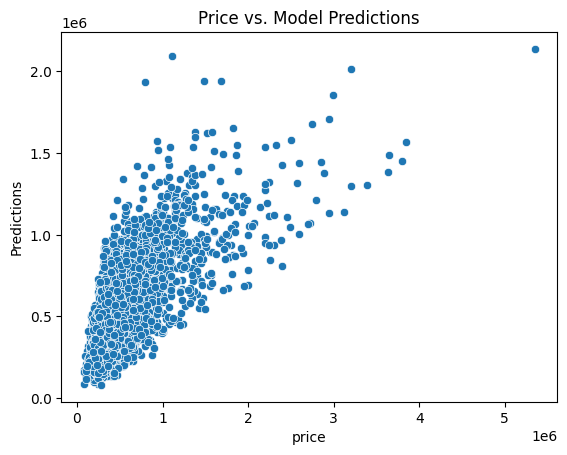

In [37]:
# Scatter plot of actual values of y vs predicted values
sns.scatterplot(x=y_test, y=predictions)
plt.ylabel('Predictions')
plt.title('Price vs. Model Predictions')

### Evaluation of model
I will import some metrics to evaluate this model

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [39]:
print('Mean Absolute Error:',mean_absolute_error(y_test, predictions))
print('Mean Squared Error:',mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:',math.sqrt(mean_squared_error(y_test, predictions)))

Mean Absolute Error: 172938.07636731223
Mean Squared Error: 69687885558.88472
Root Mean Squared Error: 263984.6312929689


Big values of error, seems like model is not very accurate. Ok, one more validation. 

Distribution plot of the residuals of the model's predictions. They should be normally distributed.

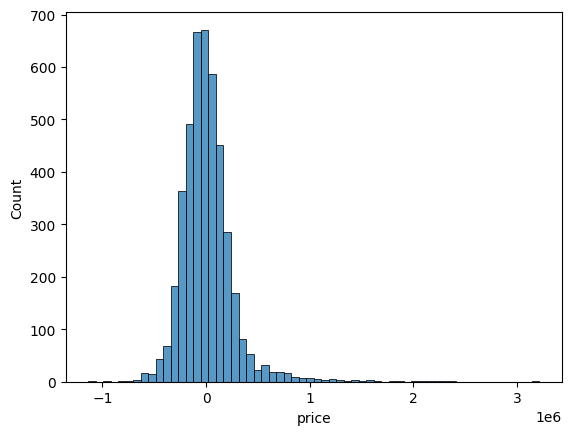

In [40]:
# residual - distance from actual data point to the line of best fit
residuals = y_test - predictions
sns.histplot(residuals, bins=60)
plt.show()